# Linear Regression
In the nature (or in a real life situation), it is unusual to observe a variable, let's say $y$, and its exact mathematical relationship with other $p$ variables $x_{j}$. Suppose now that we would like to model the (linear) relationship between a dependent variable $y$ and  $p$ explanatory variables $x_{j}$. Usually, a first modelisation would take this form

\begin{equation}
     y = \beta_{0} + \beta_{1}x_{1} + ... + \beta_{p}x_{p} + \varepsilon \  \ ,
\end{equation}

where $\varepsilon$ is a random variable that we CAN NOT observe and who adds noise to the linear relationship between the dependent and indpendent variables. Altough the noise $\varepsilon$ is unobservable, we can still estimate the real model. The relationship between the dependent and independent variables will be now estimated by

\begin{equation}
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + ... + \hat{\beta}_p x_p \ \ .
\end{equation}

Q.This is great, but how can we estimate $\hat{y}$ ?

A.By estimating $\hat{\beta}$.

Q.How can we estimate $\hat{\beta}$ ?

A.Good question! But first, let's create some artificial data :D









The dependent variable $x$ will variate between 0 and 2. The TRUE relationship between $y$ and $x$ will take this form 

\begin{equation}
    y = e^{\ 3 x} + \varepsilon \ \ sc. \ \  \varepsilon \sim \mathcal{N}(0,50^2) \ \ ,
\end{equation}

where the noise $\varepsilon$ will follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) of mean $\mu=0$ and standard deviation $\sigma=50$. Let's produce $n=200$ observations defined by the above equation.


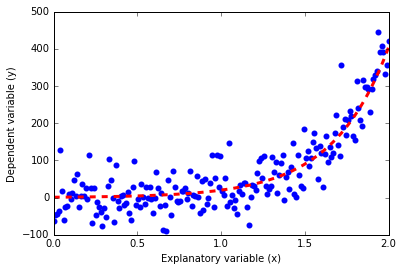

In [49]:
import numpy as np

n=200

x_tr = np.linspace(0.0, 2.0, n)
y_tr = np.exp(3*x_tr)

import random

mu, sigma = 0,50
random.seed(1)
y = y_tr + np.random.normal(loc=mu, scale= sigma, size=len(x_tr))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_tr,y,".",mew=3);
plt.plot(x_tr, y_tr,"--r",lw=3);


plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')

The red curve is defined by the function 

\begin{equation}
 \\  f(x) = e^{\ 3 x} \ \ ,
\end{equation}

and the blue dots are actually the dependent variable defined by 

\begin{equation}
    y = e^{\ 3 x} + \varepsilon \ \ sc. \ \  \varepsilon \sim \mathcal{N}(0,50^2) \ \ .
\end{equation}


Here are the available Line2D properties (See matplotlib tutorial for more `pyplot` options [here](http://matplotlib.org/users/pyplot_tutorial.html)). For the list of generating random numbers see [here](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

We can check the histogram of y (for histogram and other matplot pyplots see [here](http://matplotlib.org/api/pyplot_api.html)).

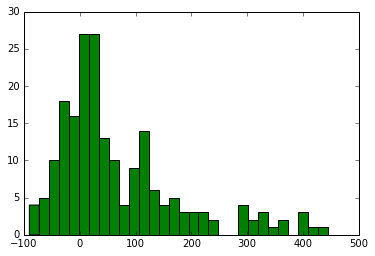

In [50]:
ignored=plt.hist(y,30, color="g")

#### Let's fit a simple linear model on $y$ and $x$. 
First of all, we need to import the librairy [scikit.learn](http://scikit-learn.org/stable/). There is a lot of algorithms and each of them is well explained. Stop wasting your time with [cat video](https://www.youtube.com/watch?v=UoUEQYjYgf4), be a [data scientist](http://www.sintetia.com/wp-content/uploads/2014/05/Data-Scientist-What-I-really-do.png). We won't talk about how we can theorically fit the model, but you may find the information [here](https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods).

(200,)
(200, 1)


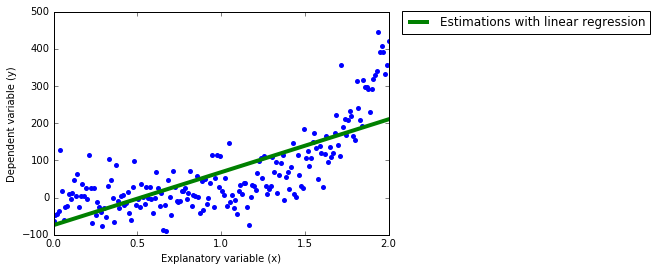

In [51]:
import sklearn.linear_model as lm
lr=lm.LinearRegression()

#We can see that the dimensions indicated are different
#In fact, the data in the second expression is "reshape" 
#This is necessary if we want to use the linear regression command with scikit learn
#Otherwise, python send us a message error
print np.shape(x_tr)
print np.shape(x_tr[:, np.newaxis])

#We regress y on x, then estimate y
lr.fit(x_tr[:, np.newaxis],y)
y_hat=lr.predict(x_tr[:, np.newaxis])

plt.plot(x_tr,y,".",mew=2)
plt.plot(x_tr, y_hat,"-g",lw=4, label='Estimations with linear regression')

plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')
plt.legend(bbox_to_anchor=(1.8, 1.03))

Well, that's not really good... We can do better!

#### Exercise

Replace $x$ with $x^2$ and regress $y$ as defined earlier on $x^2$. 
The 'new' fitted model will be 

\begin{equation}
    \hat{y}=\hat{\beta}_0+ \hat{\beta}_1 x^2 \ .
\end{equation}



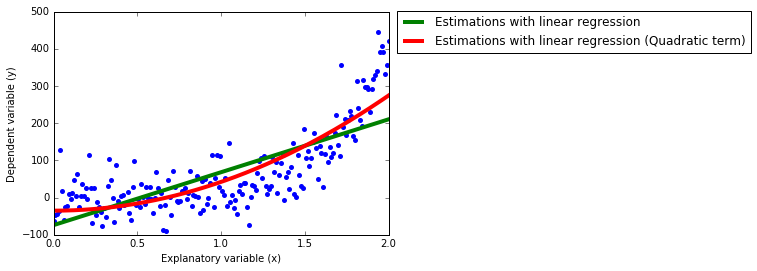

In [52]:
#And then fit the model
lr.fit(x_tr[:, np.newaxis]**2,y)
y_hat2=lr.predict(x_tr[:, np.newaxis]**2)

#Let's check it out
plt.plot(x_tr,y,".",mew=2);

plt.plot(x_tr, y_hat,"-g",lw=4, label='Estimations with linear regression')
plt.plot(x_tr, y_hat2,"-r",lw=4, label='Estimations with linear regression (Quadratic term)');


plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')
plt.legend(bbox_to_anchor=(2.1, 1.03))

#### Question
Which one do you prefer?

# Classification
In the last example, the dependent variable was continuous. Now suppose that the dependent $y$ variable is binary. This makes the cross-road between regression and classification. First, let's create the binary outcome.

In [53]:
index=y>90
z=(1*(y>90)-0.5)*2

#print index, z

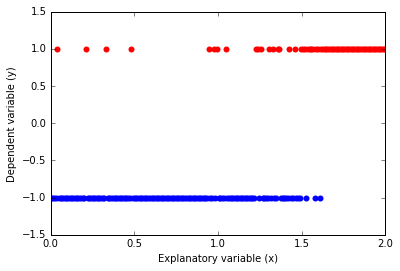

In [54]:
#The tilt symbol ~ below means the opposite of the boolean value
plt.figure()
plt.plot(x_tr[index],z[index],".r",mew=3)
plt.plot(x_tr[~index],z[~index],".b",mew=3)

plt.ylim(-1.5,1.5)
plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')

### Linear regression
Now that the new dependent variable $z$ takes binary values (-1 or 1), we could still think of it as a real-valued variable on which we can do standard linear regression! Thus, the gaussian noise model on $z$ doesn't make sense anymore, but we can still do least-squares approximation to estimate the parameters of a linear decision boundary.

In [55]:
lr.fit(x_tr[:, np.newaxis],z)
z_hat=lr.predict(x_tr[:, np.newaxis])

#We define a threshold overwhat the z estimation will be considered as 1
threshold = 0

z_class= 2*(z_hat>threshold) - 1

We create 2 functions. The first one, called plotbc should plot the predictions done (and their accurancy) by the linear regression. The second one calculate the classification rate.

In [56]:
#This function simply calculate the classification rate on the training set
def plotbc(x, y, z):
    #Plot the classification
    plt.plot(x[z==1],z[z==1],".r", markersize=3, label='True positive')
    plt.plot(x[z==-1],z[z==-1],".b", markersize=3, label='True negative')

    #Plot the classification errors
    plt.plot(x[(z==-1) & (y==1)],z[(z==-1) & (y==1)],"^y", markersize=10, label='False negative')
    plt.plot(x[(z==1) & (y==-1)],z[(z==1) & (y==-1)],"^c", markersize=10, label='False positive')
    plt.legend(bbox_to_anchor=(1.55, 1.03))

    plt.ylim(-1.5,1.5)

#This function simply calculate the classification rate on the training set
def precision(y, z):
    print "The classification rate is :"
    print np.mean(y==z)

We now call the functions previously defined.

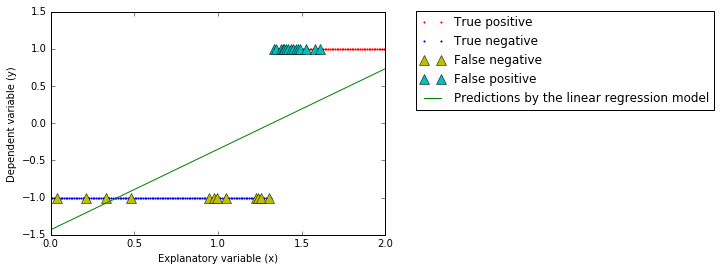

In [57]:
plotbc(x_tr, z, z_class)
plt.plot(x_tr,z_hat,"-g",lw=1, label='Predictions by the linear regression model');
plt.legend(bbox_to_anchor=(2, 1.03))
plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')

Let's compute the confusion rate.

In [58]:
precision(z_class, z)

The classification rate is :
0.865


But maybe we could get more information with the [confusion matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)!

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(z,z_class)/float(len(z))

array([[ 0.6  ,  0.075],
       [ 0.06 ,  0.265]])

### Logistic regression

We will now perform classification using [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The modelisation behind the logistic regression is  

\begin{equation}
    \mathbb{P}(y^{(i)} = 1 \ | \ \ x^{(i)}) = \frac{1}{1+e^{-\beta_{0}-\beta_{1}x_{1}^{(i)}}}
\end{equation}

where $\boldsymbol{\beta}$ is estimated with [maximum likelihood](https://en.wikipedia.org/wiki/Logistic_regression#Estimation)

\begin{equation}
\widehat{\boldsymbol{\beta}} = \arg\!\max_{\boldsymbol{\beta}} \prod_{i=1}^{n} \mathbb{P}(y^{(i)} = 1 \ | \ \ x^{(i)})^{y^{(i)}} \big(1-\mathbb{P}(y^{(i)} = 1 \ | \ \ x^{(i)})\big)^{ -y^{(i)}} \  \ . 
\end{equation}





In [60]:
from sklearn import linear_model, datasets

#The C parameter (Strictly positive) controls the regularization strength
#Smaller values specify stronger regularization
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(x_tr[:, np.newaxis], z)
z_hat=logreg.predict(x_tr[:, np.newaxis])

array([[ 0.61 ,  0.065],
       [ 0.07 ,  0.255]])

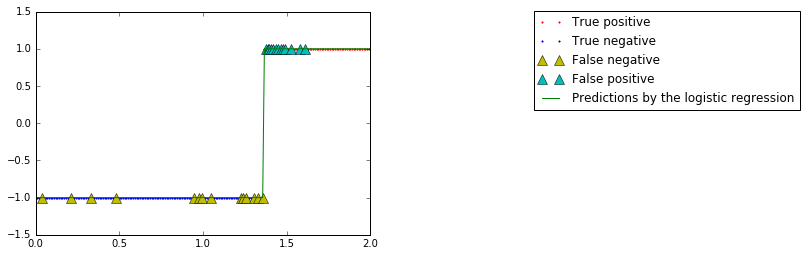

In [61]:
plotbc(x_tr, z, z_hat)
plt.plot(x_tr,z_hat,"-g",lw=1, label='Predictions by the logistic regression');

plt.legend(bbox_to_anchor=(2.3, 1.03))
confusion_matrix(z,z_hat)/float(len(z))

The classification rate seem slightly better...

#### Question
Do you have any idea for better classification accuracy?

### Support Vector Machines (SVM)

Un autre algorithme intéressant...
[SVM](http://scikit-learn.org/stable/modules/svm.html)

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=.1, gamma=3.2)
clf.fit(x_tr[:, np.newaxis], z)
z_hat=clf.predict(x_tr[:, np.newaxis])

0.92
0.08


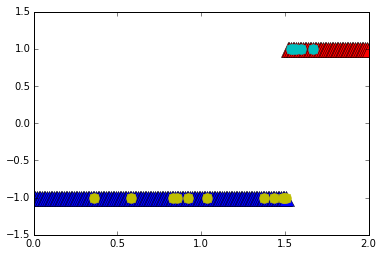

In [14]:
plotbc(x_tr, z, z_hat)
precision(z_hat, z)

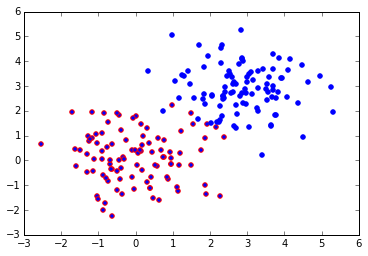

In [15]:
np.random.seed(0)
n=100
X=np.vstack((np.random.multivariate_normal([0,0],[[1,0],[0,1]] ,n), np.random.multivariate_normal([3,3],[[1,0],[0,1]] ,n)))
Y =np.array([0] * n + [1] * n)
index=(Y==0)
plt.scatter(X[index,0], X[index,1], edgecolors="r")
plt.scatter(X[~index,0], X[~index,1], edgecolors="b")

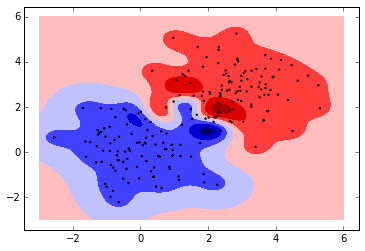

In [28]:
clf = svm.SVC(kernel="rbf", gamma=2 ,C=10)
clf.fit(X, Y)
Z=clf.predict(X)
index=(Z==0)
plt.scatter(X[index,0], X[index,1], edgecolors="r")
plt.scatter(X[~index,0], X[~index,1], edgecolors="b")
xx, yy = np.meshgrid(np.linspace(-3, 6, 500), np.linspace(-3, 6, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=1, cmap=plt.cm.seismic)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=2, alpha=0.9, cmap=plt.cm.spectral)

for the list of colormap options see [colormap help](http://matplotlib.org/users/colormaps.html) and to learn more about SVM and related options check [svm tutorial](http://scikit-learn.org/stable/modules/svm.html) and [support vector classification (svc) examples](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).